<h1> <center> Surprise Housing Assignment </center>    
<h2> <center> Student Name: Debasish Mondal, Co-hort: May-2022 </center>

### Business Goal 
A US-based housing company named `Surprise Housing` has decided to enter the `Australian market`. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market.

### Import Libraries

In [1]:
# Import the requisite libraries.
import warnings
warnings.filterwarnings(action = 'ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso

### Step 1: Data Reading

In [2]:
# Read the csv file.
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Change the index column.
housing = housing.set_index('Id')
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Data shape
housing.shape

(1460, 80)

In [5]:
# Data description
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Step 2: Data Preparation

#### Step 2.1: Null-value Inspection

In [6]:
# Data information
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Some of the columns of the dataframe contains 'NA' which are read by Pandas as NaN.

In [7]:
# Read the dataframe again to distinguish 'NA' from 'NaN'.
housing = pd.read_csv('train.csv', keep_default_na = False)
housing = housing.set_index('Id')
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [8]:
# Assign 'NA' in the following features as 'No'.
Col1 = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 
        'GarageCond', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
for val in Col1:
    housing[val].replace('NA', 'No', inplace = True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65,8450,Pave,No,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,2,2008,WD,Normal,208500
2,20,RL,80,9600,Pave,No,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,5,2007,WD,Normal,181500
3,60,RL,68,11250,Pave,No,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,9,2008,WD,Normal,223500
4,70,RL,60,9550,Pave,No,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,2,2006,WD,Abnorml,140000
5,60,RL,84,14260,Pave,No,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,12,2008,WD,Normal,250000


#### Step 2.2: Drop Irrelevant Features and Derive New Features

In [9]:
# Extract property age from the 'YearBuilt' feature.
housing['PropertyAge'] = 2022 - housing['YearBuilt'] # 2022 is the current year.
housing['PropertyAge'].unique()

array([ 19,  46,  21, 107,  22,  29,  18,  49,  91,  83,  57,  17,  60,
        16,  62,  93,  52,  55,  64,  92,  20,  54,  15,  71,  65,  95,
       102,  56,  63,  28,  68,  69,  67,  39,  47,  25,  88,  59,  41,
        58,  23,  50, 101,  77,  40,  24,  66,  74, 112,  27,  31,  13,
        72,  61,  45,  37,  43, 137, 103,  32,  53,  87,  34,  51,  70,
        86,  99,  98,  38,  96,  82,  81,  35,  36,  14, 114, 130, 106,
        90, 104, 110,  75,  97, 122,  42,  33,  30,  73, 142,  94,  44,
       100,  26,  12,  76, 109,  85,  80,  84,  48, 129, 108, 116, 132,
       124, 118, 140, 147, 111, 105, 150, 117], dtype=int64)

In [10]:
# Extract remodeling age from the 'YearRemodAdd' feature.
housing['RemodelingAge'] = 2022 - housing['YearRemodAdd'] # 2022 is the current year.
housing['RemodelingAge'].unique()

array([19, 46, 20, 52, 22, 27, 17, 49, 72, 57, 16, 60, 15, 62, 21, 55, 18,
       14, 25, 63, 32, 67, 39, 42, 56, 59, 35, 58, 50, 26, 24, 33, 69, 66,
       54, 41, 30, 13, 40, 61, 29, 23, 37, 43, 45, 53, 64, 31, 51, 70, 47,
       12, 38, 36, 28, 34, 68, 65, 71, 44, 48], dtype=int64)

In [11]:
# Drop the features 'YearBuilt' and 'YearRemodAdd' from the dataframe.
housing = housing.drop(['YearBuilt', 'YearRemodAdd'], axis = 1)
housing.shape

(1460, 80)

In the presence of 'PropertyAge' and 'RemodelingAge' features, 'MoSold', 'YrSold', 'GarageYrBlt', etc., does not show any significant difference in the analysis.

In [12]:
# Drop 'MoSold' and 'YrSold' from the dataframe.
housing = housing.drop(['MoSold', 'YrSold', 'GarageYrBlt'], axis = 1)
housing.shape

(1460, 77)

In [13]:
# The following columns mostly contain a single value that is zero, so we remove them from the dataframe because they hardly 
# add any significance to the analysis.
for val in ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']:
    print(housing[val][housing[val] == 0].value_counts())
    
housing = housing.drop(['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal'], axis = 1)
housing.shape    

0    1434
Name: LowQualFinSF, dtype: int64
0    1436
Name: 3SsnPorch, dtype: int64
0    1453
Name: PoolArea, dtype: int64
0    1408
Name: MiscVal, dtype: int64


(1460, 73)

#### Step 2.3: Type Conversion

In [14]:
# Try to identify categorical features which are shown as numerical fetaures.
for val in housing.columns:
    if(housing[val].nunique() <= 15 and housing[val].dtype != 'O'):
        print(val, housing[val].unique(), housing[val].dtype)

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40] int64
OverallQual [ 7  6  8  5  9  4 10  3  1  2] int64
OverallCond [5 8 6 7 4 2 3 9 1] int64
BsmtFullBath [1 0 2 3] int64
BsmtHalfBath [0 1 2] int64
FullBath [2 1 3 0] int64
HalfBath [1 0 2] int64
BedroomAbvGr [3 4 1 2 0 5 6 8] int64
KitchenAbvGr [1 2 3 0] int64
TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3  2 14] int64
Fireplaces [0 1 2 3] int64
GarageCars [2 3 1 0 4] int64


In [15]:
# Among the above columns, the following columns should be identified as categorical rather than numerical.
Col2 = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars']
housing[Col2] = housing[Col2].astype('object')

In [16]:
# Check the categorical conversion.
housing[Col2].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
BsmtFullBath    object
BsmtHalfBath    object
FullBath        object
HalfBath        object
BedroomAbvGr    object
KitchenAbvGr    object
TotRmsAbvGrd    object
Fireplaces      object
GarageCars      object
dtype: object

In [17]:
# The following two columns should be identified as numerical features rather than categorical features.
housing['LotFrontage'] = pd.to_numeric(housing['LotFrontage'], errors = 'coerce')
housing['MasVnrArea'] = pd.to_numeric(housing['MasVnrArea'], errors = 'coerce')

In [18]:
# Check the numerical conversion.
housing[['LotFrontage', 'MasVnrArea']].dtypes

LotFrontage    float64
MasVnrArea     float64
dtype: object

#### Step 2.4: Data Imputation

In [19]:
# List of numerical and categorical columns.
Num_Cols = []
Cat_Cols = []
for val in housing.columns:
    if(housing[val].dtypes != 'O'):
        Num_Cols.append(val)
    else:
        Cat_Cols.append(val)
print('Numerical Columns: ')
print(Num_Cols)
print('Categorical Columns: ')
print(Cat_Cols)

Numerical Columns: 
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'PropertyAge', 'RemodelingAge']
Categorical Columns: 
['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', '

In [20]:
# Check null values in all categorical columns.
round(housing[Cat_Cols].isnull().sum()*100/housing.shape[0], 2)

MSSubClass       0.0
MSZoning         0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinType2     0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
KitchenQual      0.0
TotRmsAbvGrd     0.0
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
GarageFinish     0.0
GarageCars       0.0
GarageQual   

In [21]:
# Check null values in all numerical columns.
round(housing[Num_Cols].isnull().sum()*100/housing.shape[0], 2)

LotFrontage      17.74
LotArea           0.00
MasVnrArea        0.55
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
1stFlrSF          0.00
2ndFlrSF          0.00
GrLivArea         0.00
GarageArea        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
ScreenPorch       0.00
SalePrice         0.00
PropertyAge       0.00
RemodelingAge     0.00
dtype: float64

In [22]:
# Replace the remaining nan values in numerical columns with their respective medians.
for val in ['LotFrontage', 'MasVnrArea']:
    housing[val].fillna(housing[val].median(), inplace = True)

In [23]:
# Again check null values in all numerical columns.
round(housing[Num_Cols].isnull().sum()*100/housing.shape[0], 2)

LotFrontage      0.0
LotArea          0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
GrLivArea        0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
ScreenPorch      0.0
SalePrice        0.0
PropertyAge      0.0
RemodelingAge    0.0
dtype: float64

#### Step 2.5: Data Transformation

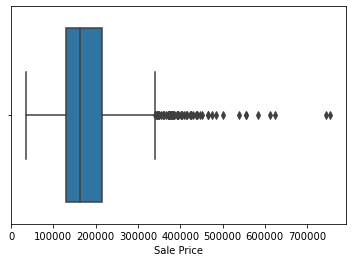

In [24]:
# Check the distribution of the 'SalePrice' column since this is our response feature.
sns.boxplot(housing['SalePrice'])
plt.xlabel('Sale Price')
plt.show()

#### As a result, the 'SalePrice' feature's distribution is skewed, and we use a log transformation to normalize its distribution.

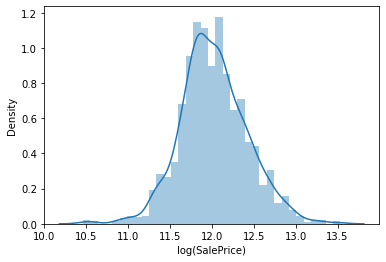

In [25]:
# log tranformation of SalePrice' feature
housing['SalePrice'] = np.log(housing['SalePrice'])
sns.distplot(housing['SalePrice'])
plt.xlabel('log(SalePrice)')
plt.show()

### Step 3: Exploratory Data Analysis (EDA)

#### Step 3.1: Categorical Data Analysis

In [26]:
# List categorical columns.
print(Cat_Cols)

['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


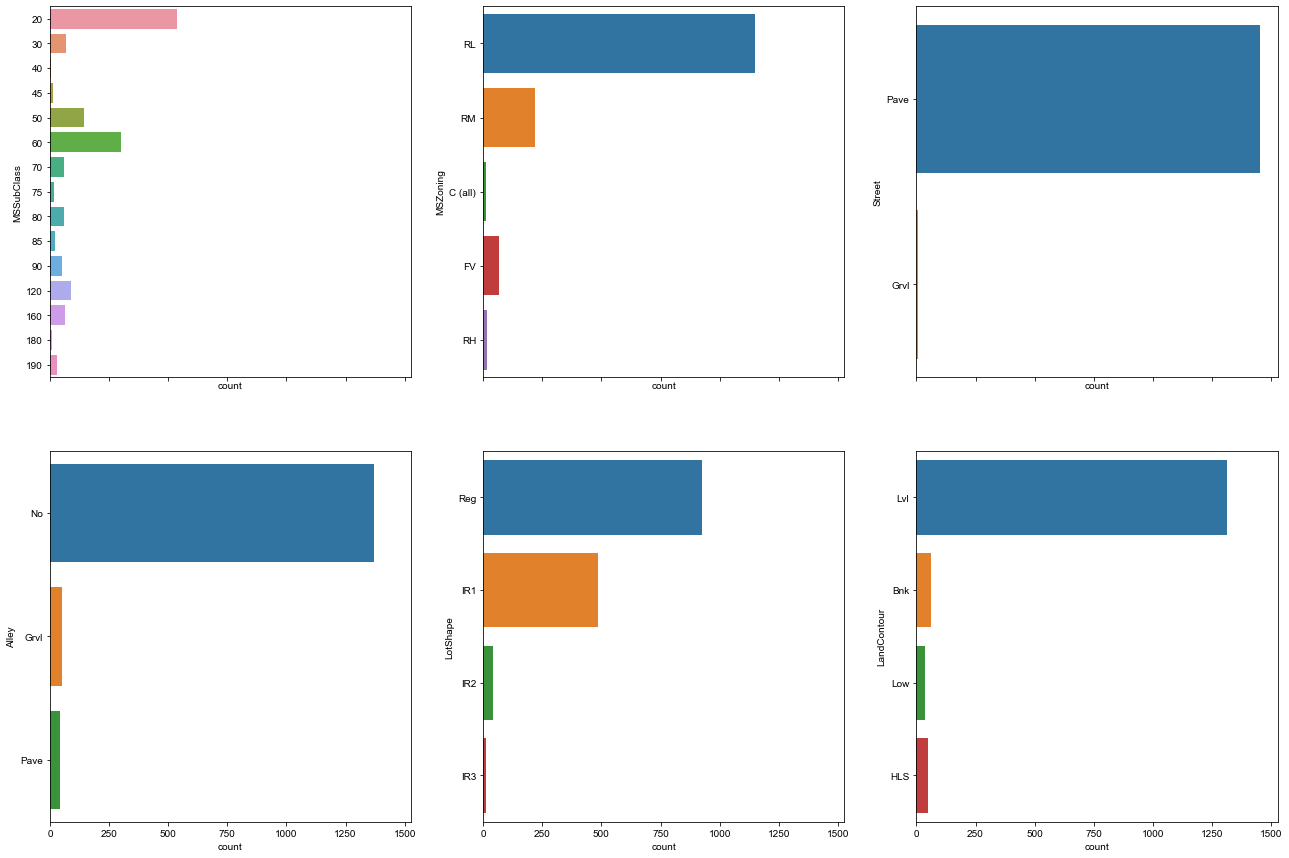

In [27]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['MSSubClass'], ax = axs[0][0])
sns.countplot(y = housing['MSZoning'], ax = axs[0][1])
sns.countplot(y = housing['Street'], ax = axs[0][2])
sns.countplot(y = housing['Alley'], ax = axs[1][0])
sns.countplot(y = housing['LotShape'], ax = axs[1][1])
sns.countplot(y = housing['LandContour'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

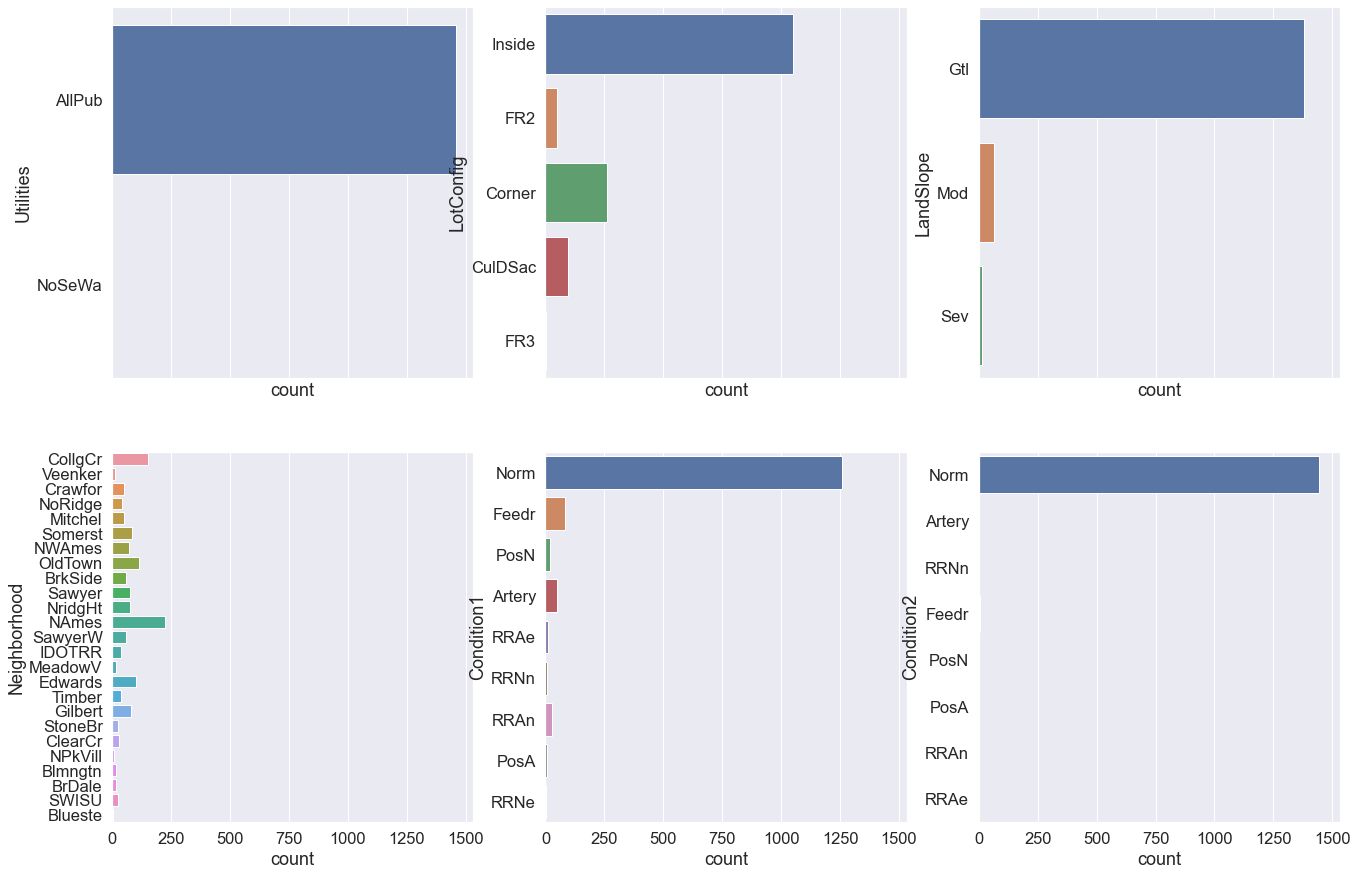

In [28]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['Utilities'], ax = axs[0][0])
sns.countplot(y = housing['LotConfig'], ax = axs[0][1])
sns.countplot(y = housing['LandSlope'], ax = axs[0][2])
sns.countplot(y = housing['Neighborhood'], ax = axs[1][0])
sns.countplot(y = housing['Condition1'], ax = axs[1][1])
sns.countplot(y = housing['Condition2'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

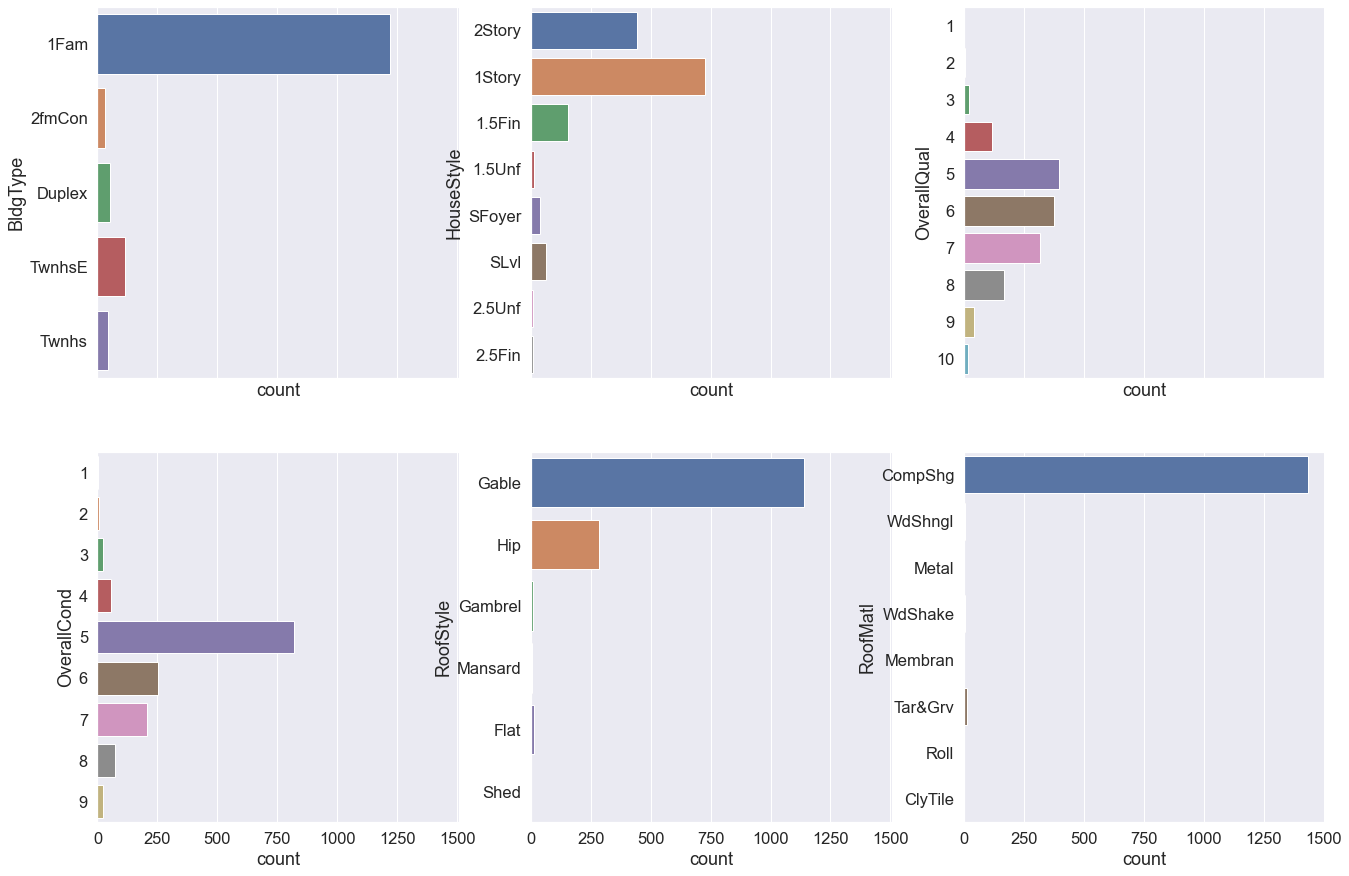

In [29]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['BldgType'], ax = axs[0][0])
sns.countplot(y = housing['HouseStyle'], ax = axs[0][1])
sns.countplot(y = housing['OverallQual'], ax = axs[0][2])
sns.countplot(y = housing['OverallCond'], ax = axs[1][0])
sns.countplot(y = housing['RoofStyle'], ax = axs[1][1])
sns.countplot(y = housing['RoofMatl'], ax = axs[1][2])
plt.show()

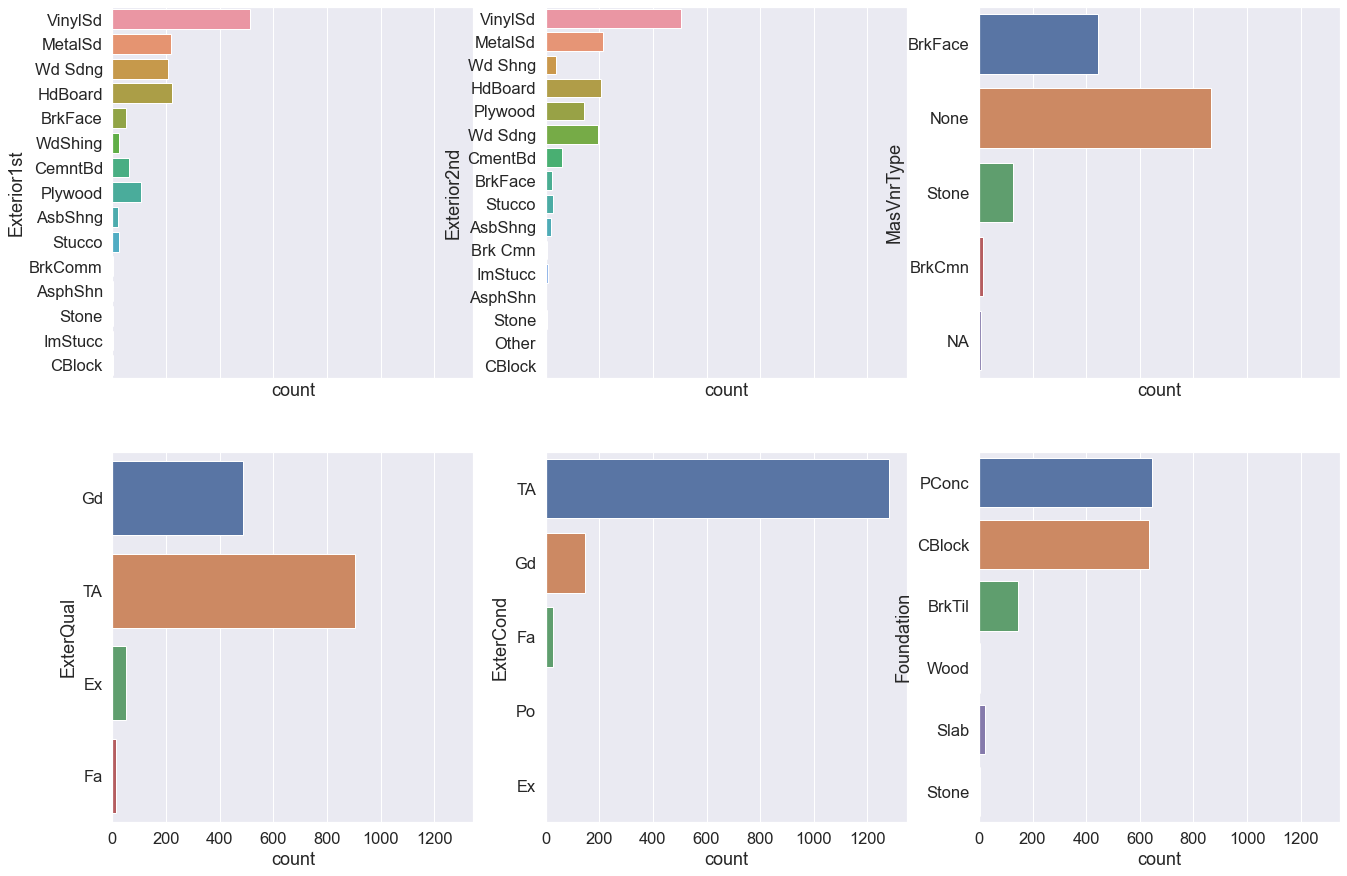

In [30]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['Exterior1st'], ax = axs[0][0])
sns.countplot(y = housing['Exterior2nd'], ax = axs[0][1])
sns.countplot(y = housing['MasVnrType'], ax = axs[0][2])
sns.countplot(y = housing['ExterQual'], ax = axs[1][0])
sns.countplot(y = housing['ExterCond'], ax = axs[1][1])
sns.countplot(y = housing['Foundation'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

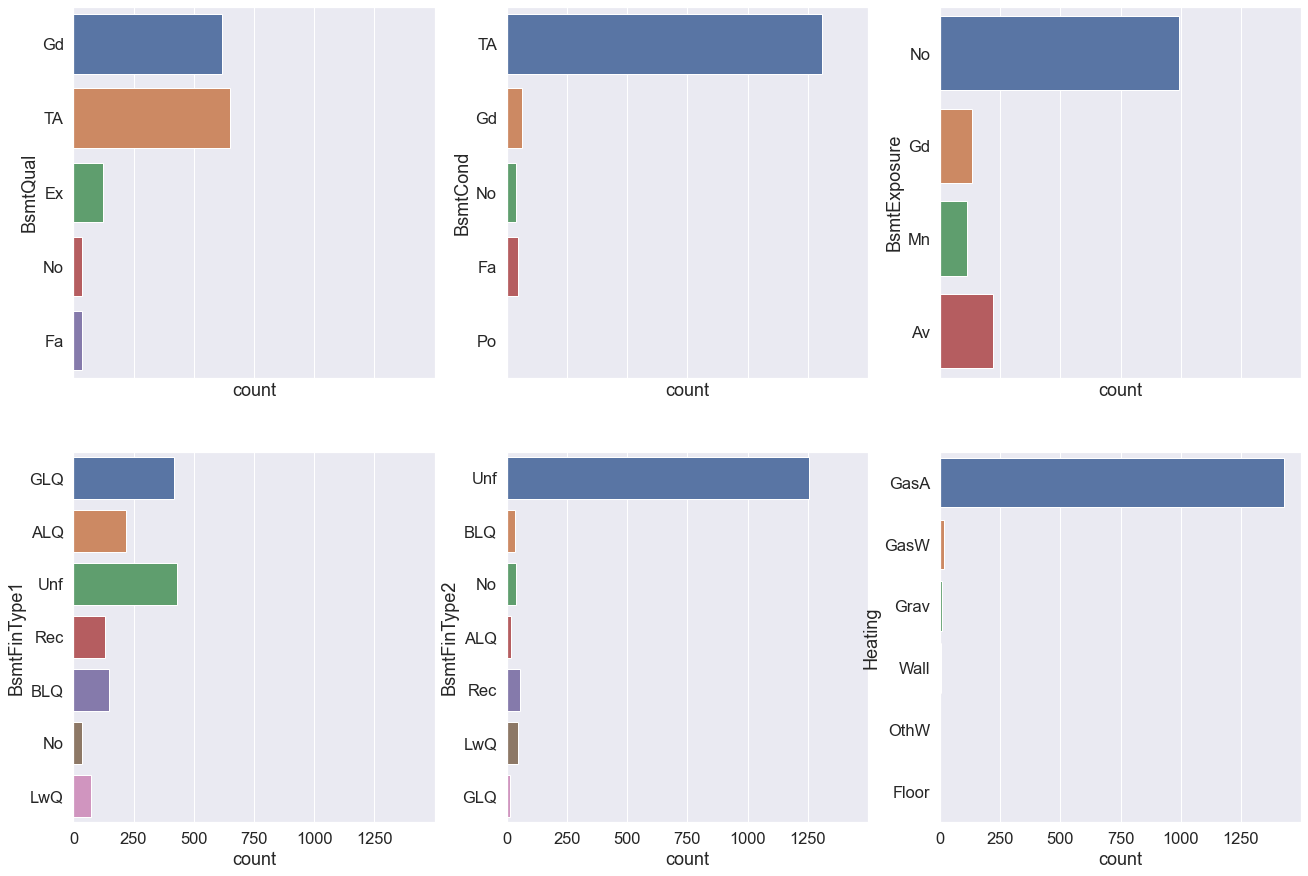

In [31]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['BsmtQual'], ax = axs[0][0])
sns.countplot(y = housing['BsmtCond'], ax = axs[0][1])
sns.countplot(y = housing['BsmtExposure'], ax = axs[0][2])
sns.countplot(y = housing['BsmtFinType1'], ax = axs[1][0])
sns.countplot(y = housing['BsmtFinType2'], ax = axs[1][1])
sns.countplot(y = housing['Heating'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

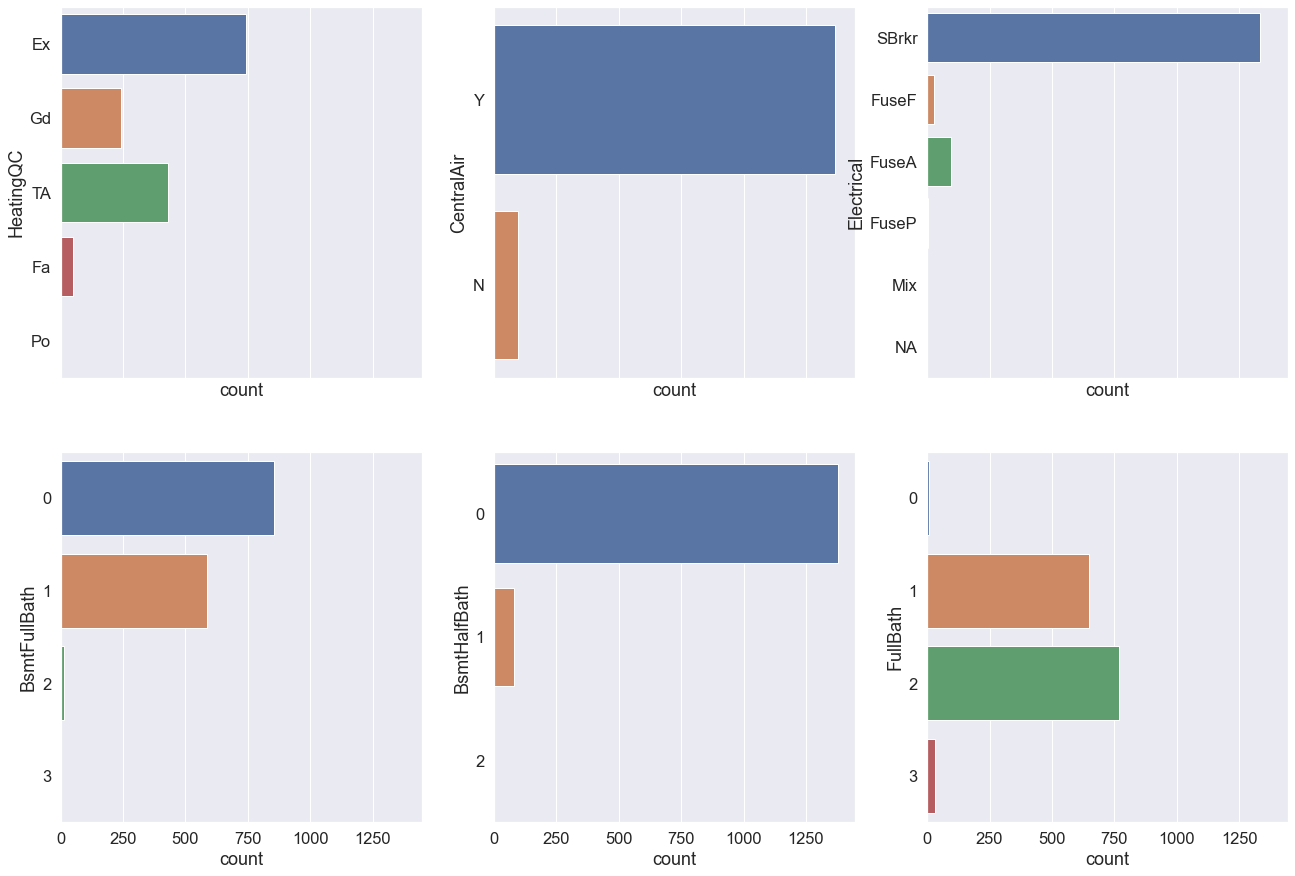

In [32]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['HeatingQC'], ax = axs[0][0])
sns.countplot(y = housing['CentralAir'], ax = axs[0][1])
sns.countplot(y = housing['Electrical'], ax = axs[0][2])
sns.countplot(y = housing['BsmtFullBath'], ax = axs[1][0])
sns.countplot(y = housing['BsmtHalfBath'], ax = axs[1][1])
sns.countplot(y = housing['FullBath'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

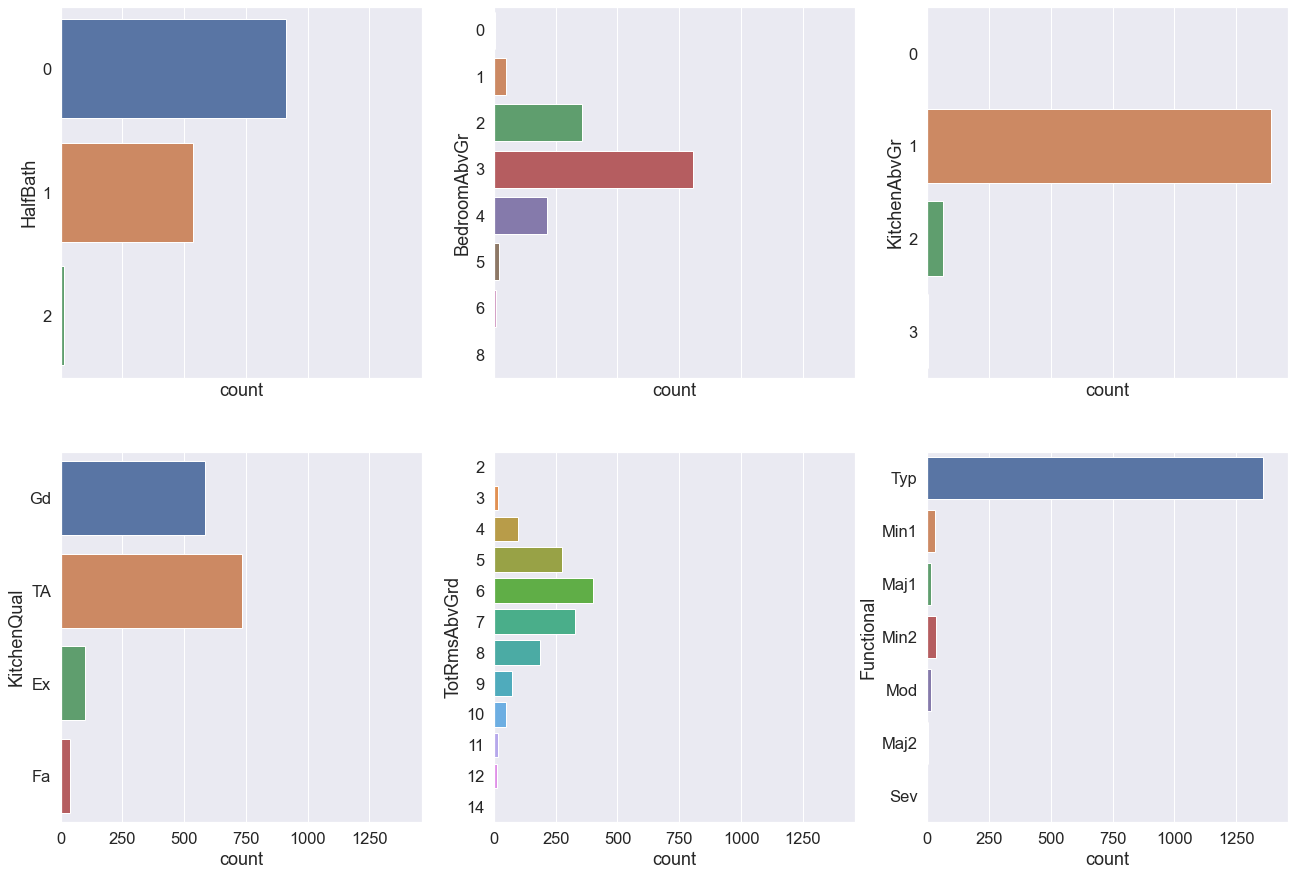

In [33]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharex = True)
sns.countplot(y = housing['HalfBath'], ax = axs[0][0])
sns.countplot(y = housing['BedroomAbvGr'], ax = axs[0][1])
sns.countplot(y = housing['KitchenAbvGr'], ax = axs[0][2])
sns.countplot(y = housing['KitchenQual'], ax = axs[1][0])
sns.countplot(y = housing['TotRmsAbvGrd'], ax = axs[1][1])
sns.countplot(y = housing['Functional'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

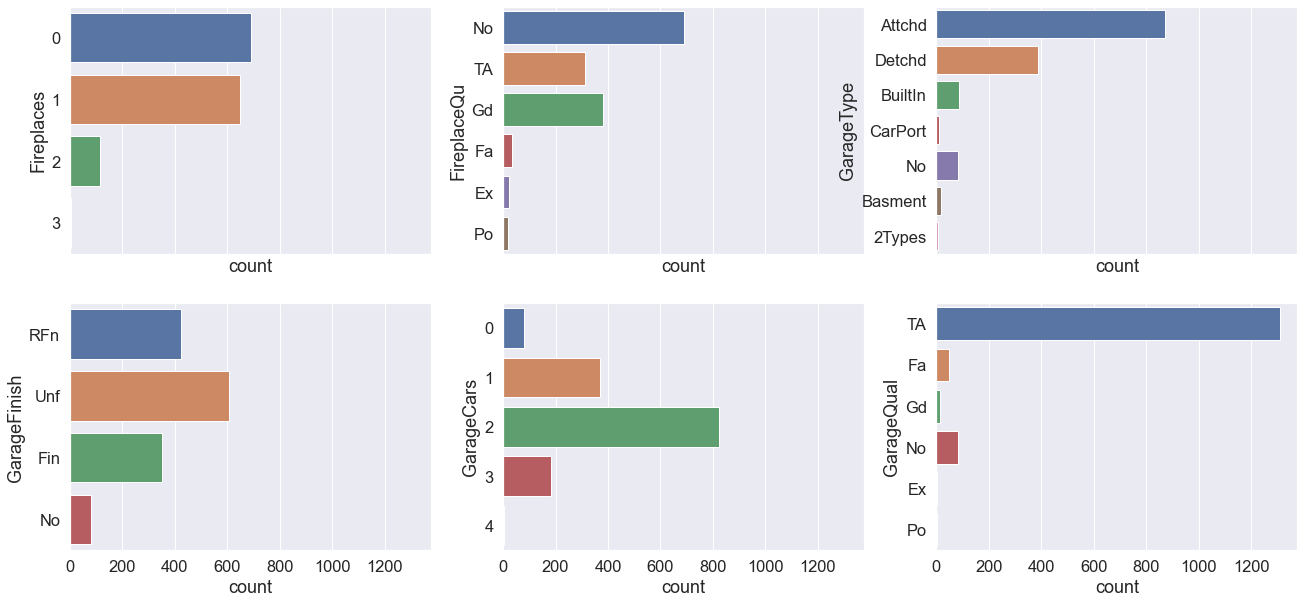

In [34]:
fig, axs = plt.subplots(2, 3, figsize = (22, 10), sharex = True)
sns.countplot(y = housing['Fireplaces'], ax = axs[0][0])
sns.countplot(y = housing['FireplaceQu'], ax = axs[0][1])
sns.countplot(y = housing['GarageType'], ax = axs[0][2])
sns.countplot(y = housing['GarageFinish'], ax = axs[1][0])
sns.countplot(y = housing['GarageCars'], ax = axs[1][1])
sns.countplot(y = housing['GarageQual'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5) 
plt.show()

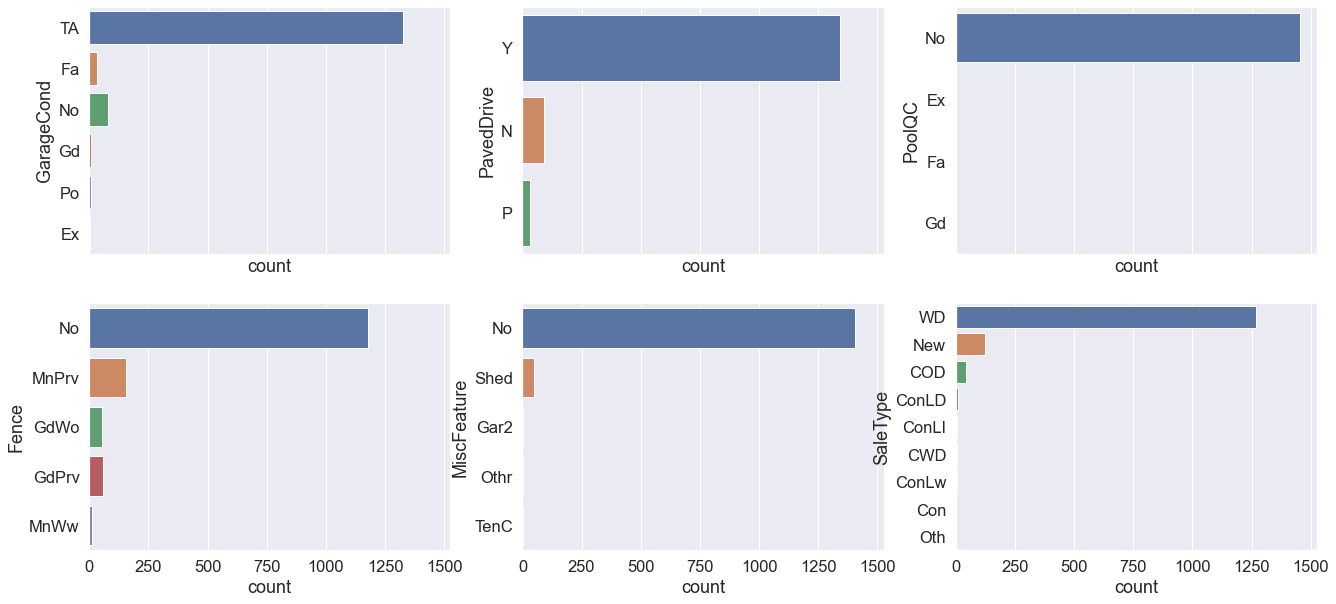

In [35]:
fig, axs = plt.subplots(2, 3, figsize = (22, 10), sharex = True)
sns.countplot(y = housing['GarageCond'], ax = axs[0][0])
sns.countplot(y = housing['PavedDrive'], ax = axs[0][1])
sns.countplot(y = housing['PoolQC'], ax = axs[0][2])
sns.countplot(y = housing['Fence'], ax = axs[1][0])
sns.countplot(y = housing['MiscFeature'], ax = axs[1][1])
sns.countplot(y = housing['SaleType'], ax = axs[1][2])
sns.set_theme(font_scale = 1.5) 
plt.show()

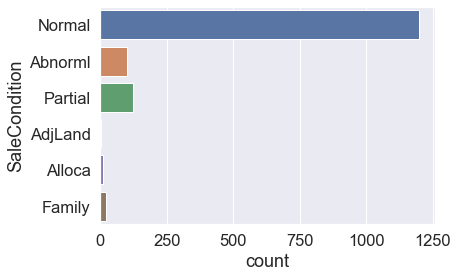

In [36]:
sns.countplot(y = housing['SaleCondition'])
sns.set_theme(font_scale = 1.5) 
plt.show()

#### Step 3.2: Numerical Data Analysis

In [37]:
# List of numerical features.
print(Num_Cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice', 'PropertyAge', 'RemodelingAge']


In [38]:
# Remove outliers from the numerical features.
for val in Num_Cols:
    housing[val][housing[val] <= housing[val].quantile(0.05)] = housing[val].quantile(0.05)
    housing[val][housing[val] >= housing[val].quantile(0.95)] = housing[val].quantile(0.95)

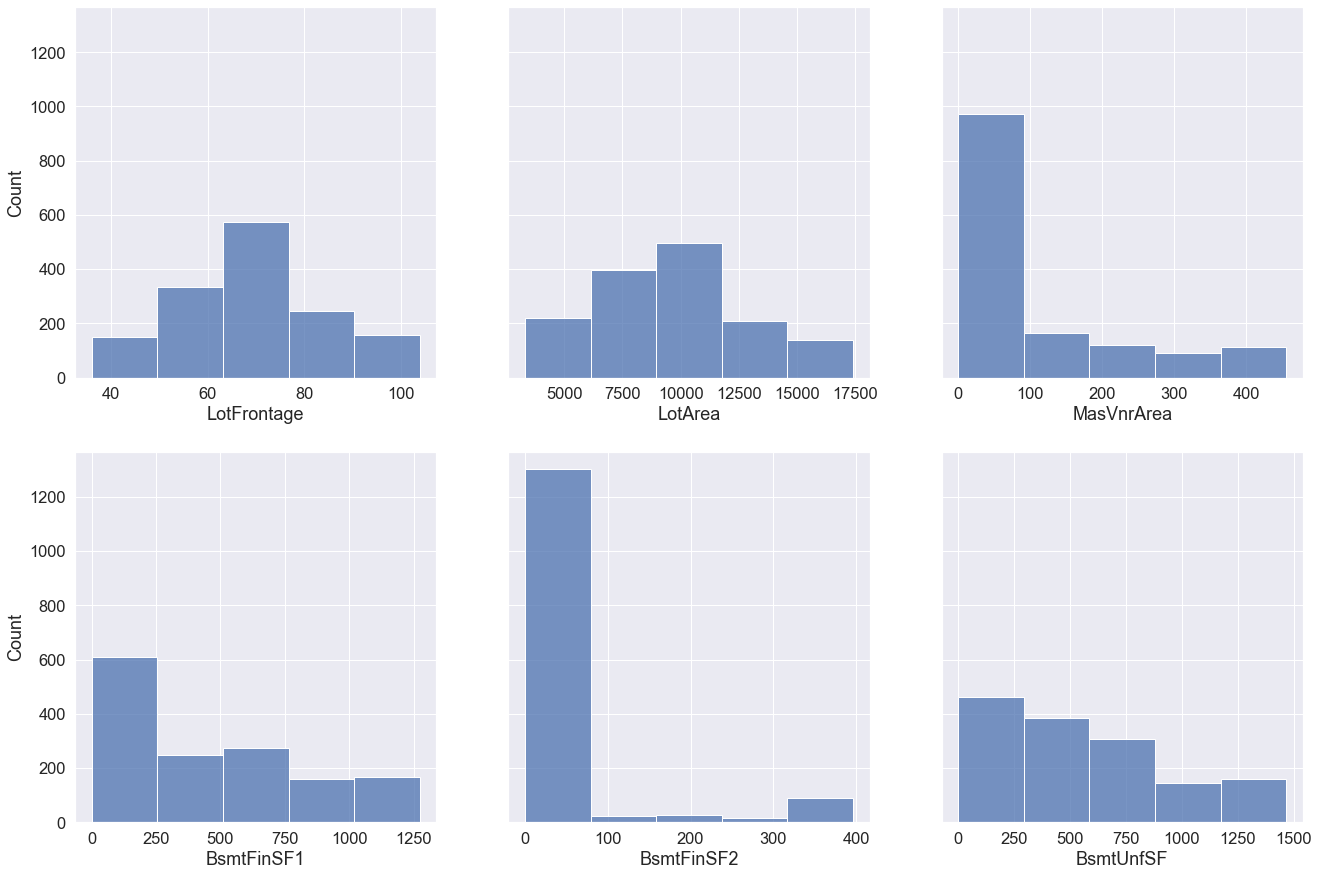

In [39]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharey = True)
sns.histplot(x = 'LotFrontage', data = housing, bins = 5, ax = axs[0][0])
sns.histplot(x = 'LotArea', data = housing, bins = 5, ax = axs[0][1])
sns.histplot(x = 'MasVnrArea', data = housing, bins = 5, ax = axs[0][2])
sns.histplot(x = 'BsmtFinSF1', data = housing, bins = 5, ax = axs[1][0])
sns.histplot(x = 'BsmtFinSF2', data = housing, bins = 5, ax = axs[1][1])
sns.histplot(x = 'BsmtUnfSF', data = housing, bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

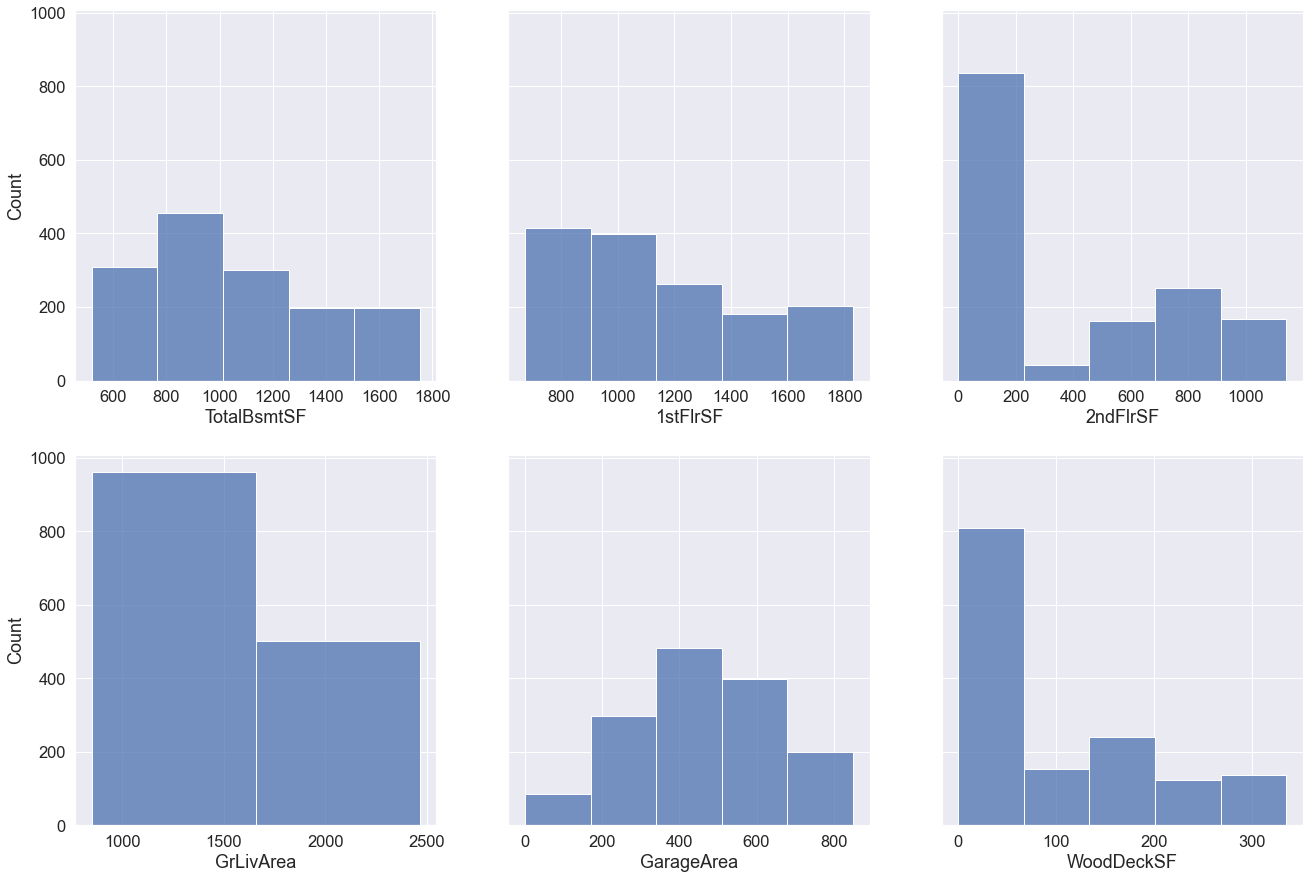

In [40]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharey = True)
sns.histplot(x = 'TotalBsmtSF', data = housing, bins = 5, ax = axs[0][0])
sns.histplot(x = '1stFlrSF', data = housing, bins = 5, ax = axs[0][1])
sns.histplot(x = '2ndFlrSF', data = housing, bins = 5, ax = axs[0][2])
sns.histplot(x = 'GrLivArea', data = housing, bins = 2, ax = axs[1][0])
sns.histplot(x = 'GarageArea', data = housing, bins = 5, ax = axs[1][1])
sns.histplot(x = 'WoodDeckSF', data = housing, bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

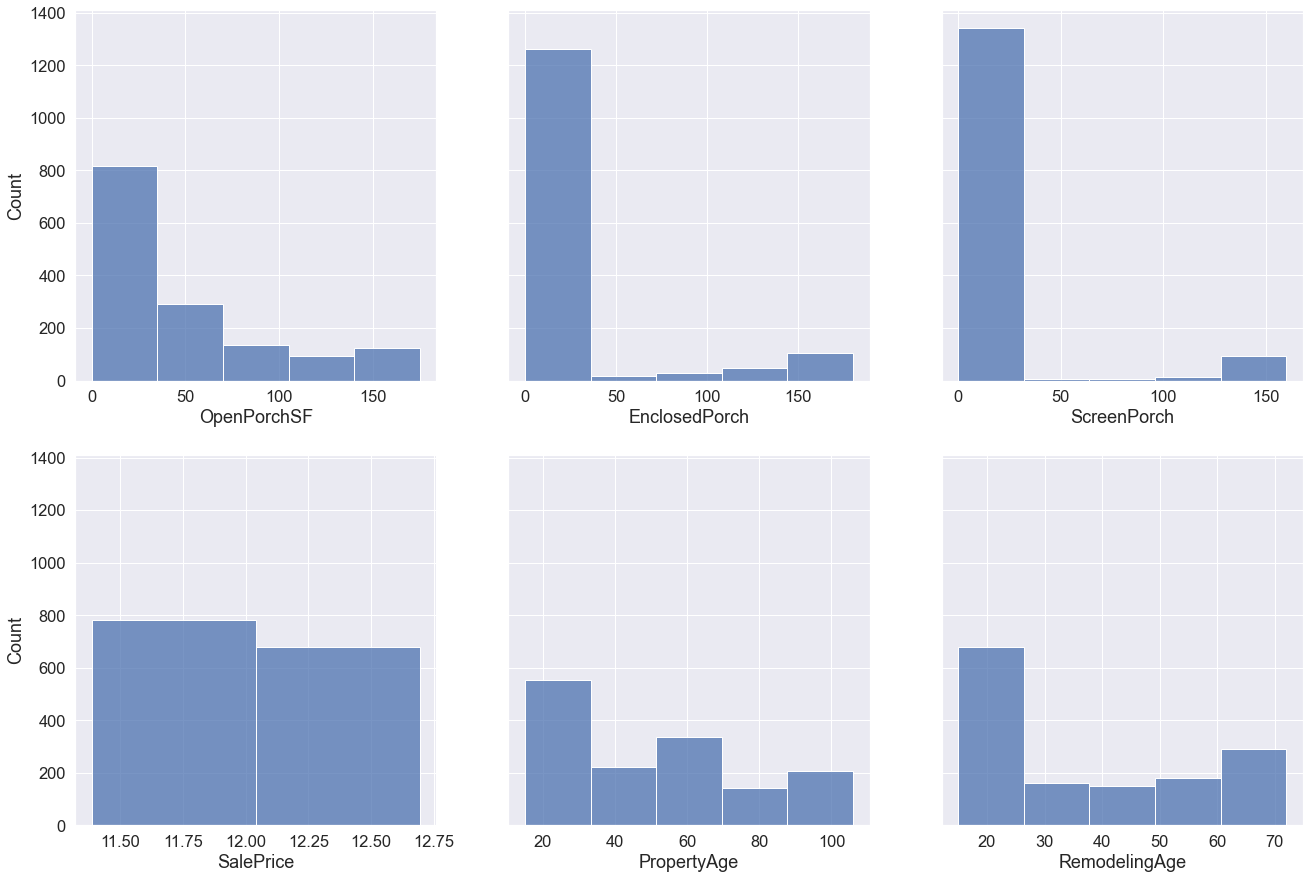

In [41]:
fig, axs = plt.subplots(2, 3, figsize = (22, 15), sharey = True)
sns.histplot(x = 'OpenPorchSF', data = housing, bins = 5, ax = axs[0][0])
sns.histplot(x = 'EnclosedPorch', data = housing, bins = 5, ax = axs[0][1])
sns.histplot(x = 'ScreenPorch', data = housing, bins = 5, ax = axs[0][2])
sns.histplot(x = 'SalePrice', data = housing, bins = 2, ax = axs[1][0])
sns.histplot(x = 'PropertyAge', data = housing, bins = 5, ax = axs[1][1])
sns.histplot(x = 'RemodelingAge', data = housing, bins = 5, ax = axs[1][2])
sns.set_theme(font_scale = 1.5)
plt.show()

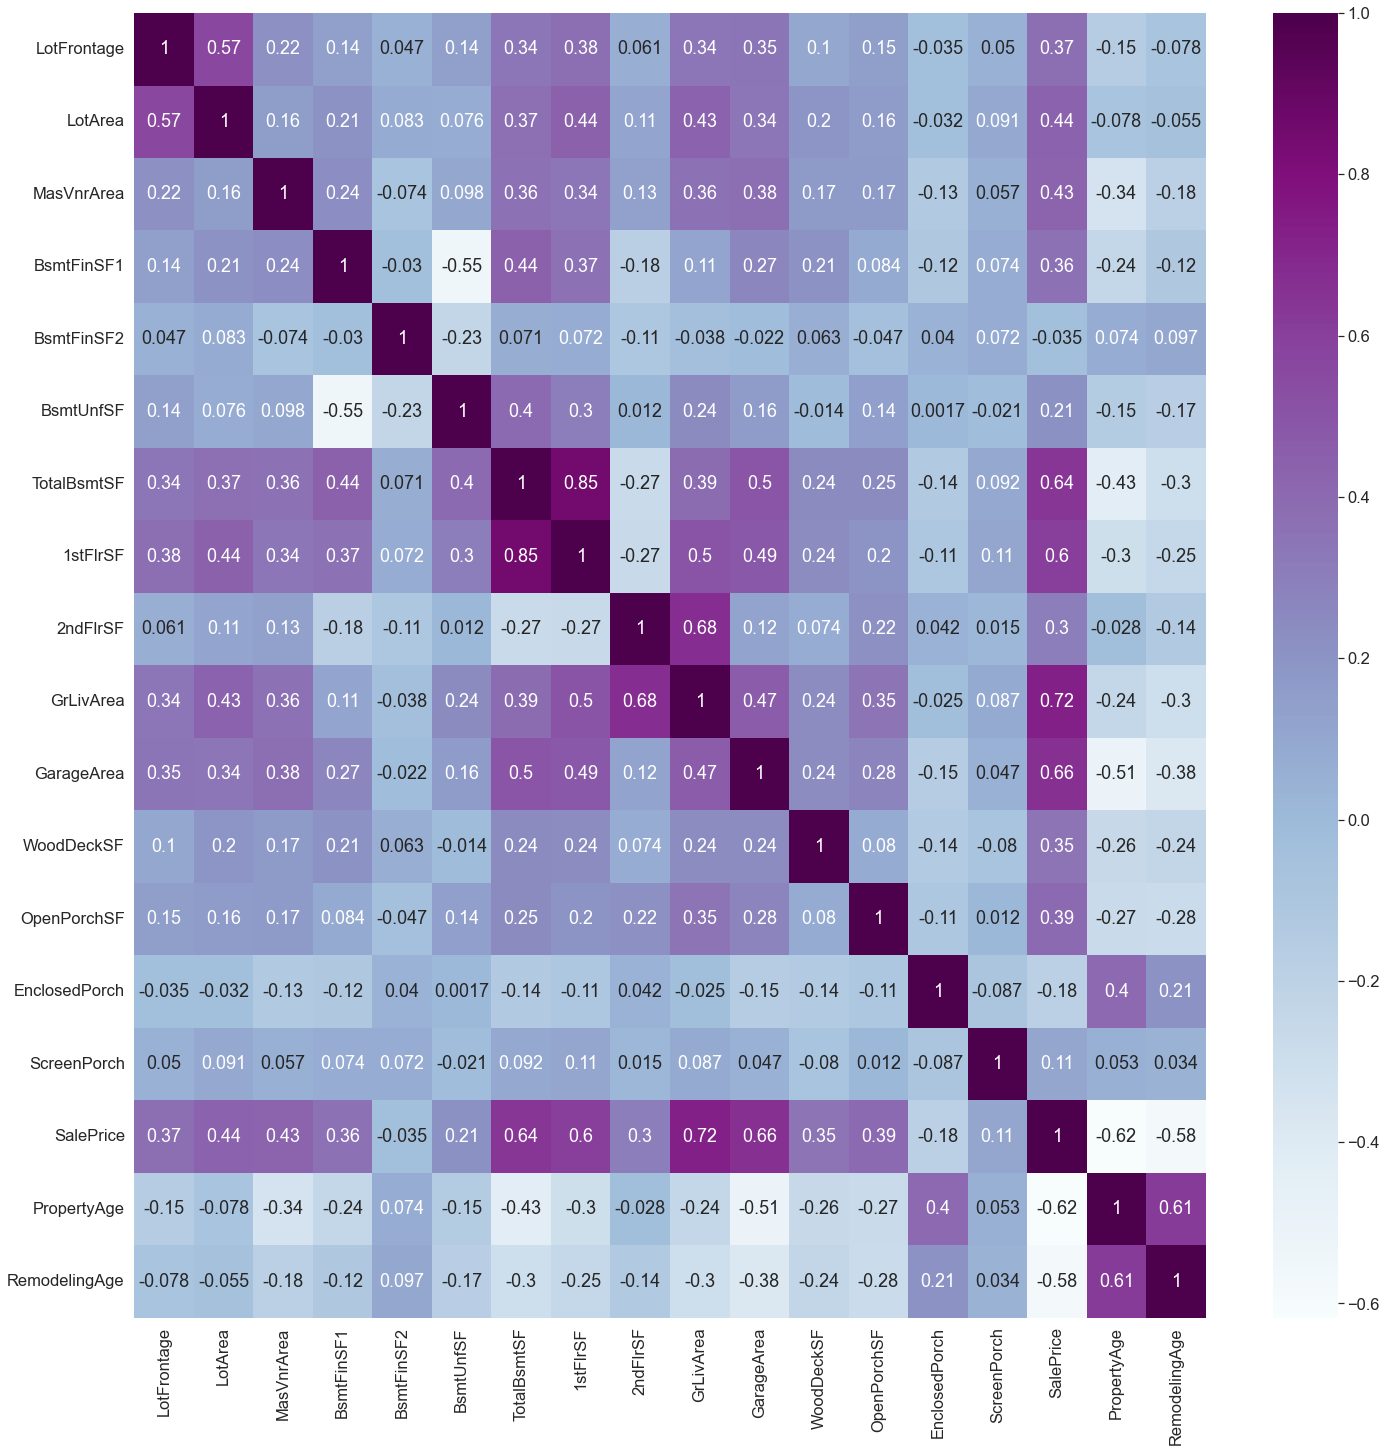

In [42]:
# Check the correlation between numerical features.
plt.figure(figsize = (24, 24))
sns.heatmap(housing[Num_Cols].corr(), annot = True, cmap = "BuPu")
plt.show()

#### We set the rule that the modulus of correlation greater than equal to 60% is an indicator of high correlation.

In [43]:
# Drop the highly correlated features.
housing = housing.drop(['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'PropertyAge', 'RemodelingAge'], axis = 1)
housing.shape

(1460, 67)

In [44]:
# Also remove the highly correalted features from the list of numerical features
for val in ['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'PropertyAge', 'RemodelingAge']:
    Num_Cols.remove(val)

In [45]:
# Updated list of numerical features.
print(Num_Cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '2ndFlrSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


### Observations based on Exploratory Data Analysis (EDA)
The demand is the maximum for following feature values:

**Categorical Feature**

01. `MSSubClass` category `20`.     
02. `MSZoning` category `RL`.    
03. `Street` category `Pave`.
04. `Alley` category `No`.
05. `LotShape` category `Reg`.
06. `LandContour` category `Lvl`.
07. `Utilities` category `Allpub`.
08. `LotConfig` category `Inside`.
09. `LandSlope` category `Gtl`.
10. `Neighborhood` category `NAmes`.
11. `Condition1` category `Norm`.
12. `Condition2` category `Norm`.
13. `BldgType` category `1Fam'.
14. `HouseStyle` category `1Story`.
15. `OverallQual` category `5`.
16. `OverallCond` category `5`.
17. `RoofStyle` category `Gable`.
18. `RoofMatl` category `CompShg`.
19. `Exterior1st` category `VinylSd`.
20. `Exterior2nd` category `VinylSd`.
21. `MasVnrType` category `None`.
22. `ExterQual` category `TA`.
23. `ExterCond` category `TA`.
24. `Foundation` category `PConc`.
25. `BsmtQual` category `TA`.
26. `BsmtCond` category `TA`.
27. `BsmtExposure` category `No`.
28. `BsmtFinType1` category `Unf`.
29. `BsmtFinType2` category `Unf`.
30. `Heating` category `GasA`.
31. `HeatingQC` category `Ex`.
32. `CentralAir` category `Y`.
33. `Electrical` category `SBrkr`.
34. `BsmtFullBath` category `0`.
35. `BsmtHalfBath` category `0`.
36. `FullBath` category `2`.
37. `HalfBath` category `0`.
38. `BedroomAbvGr` category `3`.
39. `KitchenAbvGr` category `1`.
40. `KitchenQual` category `TA`.
41. `TotRmsAbvGrd` category `6`.
42. `Functional` category `Typ`.
43. `Fireplaces` category `0`.
44. `FireplaceQu` category `No`
45. `GarageType` category `Attchd`
46. `GarageFinish` category `Unf`.
47. `GarageCars` category `2`.
48. `GarageQual` category `TA`.
49. `GarageCond` category `TA`.
50. `PavedDrive` category `Y`.
51. `PoolQC` category `No`.
52. `Fence` category `No`.
53. `MiscFeature` category `No`.
54. `SaleType` category `WD`.
55. `SaleCondition` category `Normal`.

**Numerical Feature**

01. `LotFrontage` in between `62 and 78 units` approximately.
02. `LotArea` in between `8000 and 11000 units` approximately.
03. `MasVnrArea` in between `0 and 100 units` approximately. 
04. `BsmtFinSF1` in between `0 and 250 units`.
05. `BsmtFinSF2` in between `0 and 80 units` approximately.
06. `BsmtUnfSF` in between `0 and 240 units` approximately.
07. `TotalBsmtSF` in between `700 and 1000 units` approximately.
08. `1stFlrSF` in between `0 and 900 units` approximately.
09. `2ndFlrSF` in between `0 and 210 units` approximately.
10. `LowQualFinSF` in between `0 and 280 units` approximately. 
11. `GrLivArea` in between `0 and 1800 units` approximately.
12. `GarageArea` in between `350 and 500 units` approximately.
13. `WoodDeckSF` in between `0 and 60 units` approximately.
14. `OpenPorchSF` in between `0 and 35 units` approximately.
15. `EnclosedPorch` in between `0 and 35 units` approximately. 
16. `ScreenPorch` in between `0 and 30 units` approximately.
17. `SalePrice` in between `0 and 12.5 units (in log scale)` approximately. 
18. `PropertyAge` in between `0 and 35 units` approximately. 
19. `RemodelingAge` in between `0 and 35 units` approximately. 

**Following Numerical Features are highly correlated**

01. `SalePrice` and `TotalBsmtSF` (positive correlation).
02. `SalePrice` and `1stFlrSF` (positive correlation).
03. `SalePrice` and `GrLivArea` (positive correlation).
04. `SalePrice` and `GarageArea` (positive correlation).
05. `SalePrice` and `PropertyAge` (negative correlation).
06. `PropertyAge` and `RemodelingAge` (positive correlation).
07. `1stFlrSF` and `TotalBsmtSF` (positive correlation).

### Step 4: Model Building

#### Step 4.1: Dummy Encoding

In [46]:
# Dummy variable creation for categorical features.
housing_dummy = pd.get_dummies(housing[Cat_Cols], drop_first = True)

In [47]:
# Join dummy variables to the original dataframe.
housing = pd.concat([housing, housing_dummy], axis = 1)

In [48]:
# Drop extra variables from the original dataframe.
housing = housing.drop(Cat_Cols, axis = 1)

In [49]:
# Check the shape of remaining dataframe.
housing.shape

(1460, 305)

#### Step 4.2: Test-Train Splitting

In [50]:
# Test-train split.
X = housing.drop('SalePrice', axis = 1)
y = housing['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
# Check the test and train dataframes size.
print(X_train.shape)
print(X_test.shape)

(1021, 304)
(438, 304)


#### Step 4.3: Rescaling Features

In [52]:
# Define rescaling object.
scaler = StandardScaler()

In [53]:
# Remove 'SalePrice' from the list of numerical columns since this is the response feature.
Num_Cols.remove('SalePrice')

In [54]:
# Apply scaling to the numerical features of both train and test data separately.
X_train[Num_Cols] = scaler.fit_transform(X_train[Num_Cols])
X_test[Num_Cols] = scaler.transform(X_test[Num_Cols])

In [55]:
# Inspect the scaling of the train data.
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
211,-0.106787,-1.170115,-0.650325,0.082728,-0.332312,-0.373082,-0.808093,-0.801765,-0.809331,1.462645,...,0,0,0,0,1,0,0,0,1,0
319,1.275349,0.073241,1.158620,1.341089,-0.332312,-0.458591,1.961881,2.271410,0.314757,2.390188,...,0,0,0,0,1,0,0,0,1,0
240,-1.008180,-0.262199,-0.650325,-0.824068,-0.332312,0.208848,0.864500,-0.801765,1.813541,-0.392443,...,0,0,0,0,1,0,0,0,1,0
987,-0.587530,-1.255205,-0.650325,-1.051979,-0.332312,-0.161687,0.730984,2.271410,-0.809331,-0.392443,...,0,0,0,0,1,0,0,0,1,0
1417,-0.527437,0.490009,-0.650325,-1.051979,-0.332312,0.531878,1.726285,-0.801765,-0.809331,1.810473,...,0,0,0,0,1,0,0,0,1,0


In [56]:
# Inspect the scaling of the test data.
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1437,-0.527437,-0.187238,-0.650325,0.441567,-0.332312,-0.724616,-0.808093,-0.801765,-0.809331,-0.392443,...,0,0,0,0,1,0,0,0,1,0
58,1.215256,0.578283,-0.650325,-1.051979,-0.332312,0.729022,1.279613,-0.801765,0.502105,-0.392443,...,0,0,0,0,1,0,0,0,1,0
781,-0.347158,-0.512838,-0.381810,-1.051979,-0.332312,1.624482,-0.808093,1.216439,-0.415901,-0.392443,...,0,0,0,0,1,0,0,0,1,0
383,0.614327,-0.116330,-0.650325,-1.051979,-0.332312,0.916665,1.274758,0.519241,0.183613,-0.392443,...,0,0,0,0,1,0,0,0,1,0
1171,0.434049,0.067453,-0.650325,0.213656,-0.332312,0.049708,-0.808093,1.060487,-0.809331,-0.392443,...,0,0,0,0,1,0,0,0,1,0


#### Step 4.4: Ridge Regression

In [57]:
# Define Ridge regression object.
ridge = Ridge()

In [58]:
# 5-fold cross-validation.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]} # Choices of tuning parmeters
ridge_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', 
                        cv = 5, return_train_score = True, verbose = 1, n_jobs = -1)            
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
# Cross-validation output.
cv_ridge = pd.DataFrame(ridge_cv.cv_results_)
cv_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.448845,0.229143,0.014332,0.014829,0.0001,{'alpha': 0.0001},-0.094881,-0.091589,-0.094813,-0.087986,...,-0.092748,0.002676,25,-0.052764,-0.053865,-0.053726,-0.055343,-0.055227,-0.054185,0.000976
1,0.023227,0.006672,0.008212,0.005467,0.001,{'alpha': 0.001},-0.094803,-0.091543,-0.094765,-0.087870,...,-0.092673,0.002690,24,-0.052781,-0.053871,-0.053731,-0.055349,-0.055231,-0.054193,0.000972
2,0.018243,0.003668,0.008068,0.008407,0.01,{'alpha': 0.01},-0.094218,-0.091162,-0.094324,-0.086880,...,-0.092039,0.002823,23,-0.052933,-0.053939,-0.053783,-0.055415,-0.055276,-0.054269,0.000944
3,0.019962,0.005815,0.003127,0.006253,0.05,{'alpha': 0.05},-0.092892,-0.090348,-0.093213,-0.084249,...,-0.090494,0.003280,22,-0.053407,-0.054237,-0.054040,-0.055802,-0.055550,-0.054607,0.000918
4,0.018759,0.006249,0.006246,0.007650,0.1,{'alpha': 0.1},-0.092027,-0.089752,-0.092230,-0.082411,...,-0.089366,0.003602,21,-0.053890,-0.054548,-0.054355,-0.056257,-0.055914,-0.054993,0.000924


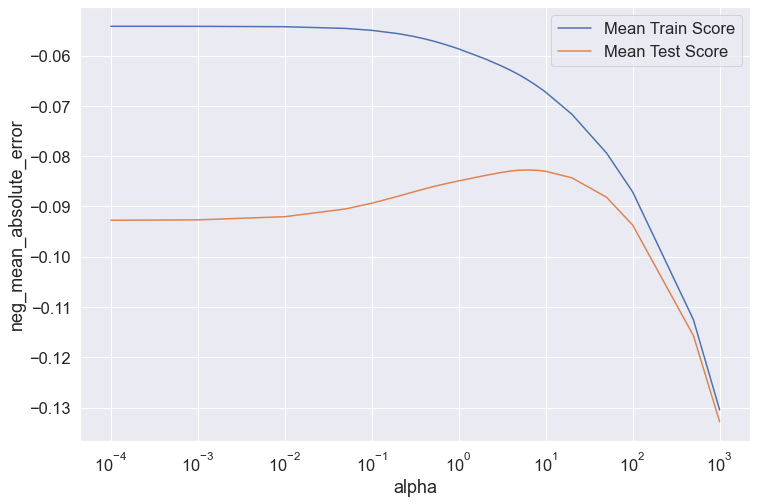

In [60]:
# Plotting the mean test and train scoes with alpha.
plt.figure(figsize = (12, 8))
plt.plot(cv_ridge['param_alpha'], cv_ridge['mean_train_score'])
plt.plot(cv_ridge['param_alpha'], cv_ridge['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.legend(['Mean Train Score', 'Mean Test Score'])
plt.xscale('log')
plt.show()

In [61]:
# Evaluate the optimal value of alpha.
ridge_cv.best_params_

{'alpha': 6.0}

#### So, the optimum value of alpha is 6.0.

In [62]:
# Define a ridge regreesion instance with alpha = 6.0.
ridge = Ridge(alpha = 6.0)

# Fit the model to the training data.
ridge.fit(X_train, y_train)

# The coefficients of the fitted Ridge regression model.
print(ridge.coef_)

[ 6.70229693e-03  3.36302927e-02  3.02812832e-03  8.72650195e-02
  2.77565060e-02  7.06227315e-02  8.49639819e-02  1.44994177e-02
  9.03048363e-03 -8.44059005e-04  6.83794225e-03 -7.34064434e-02
 -2.84042541e-02 -1.47153690e-02 -3.46153570e-02 -2.61782805e-02
  1.06074879e-02  5.73653668e-03  2.40734863e-04  1.37713919e-02
  7.79697021e-03  1.60458965e-02 -4.71002336e-02 -1.37034849e-02
 -1.97720189e-02  4.39942911e-02  4.18766606e-02  1.68483468e-02
 -1.23789385e-02  6.52703918e-03  4.45526022e-03  3.39532851e-02
  5.24246313e-03 -1.15228126e-02  1.91418217e-03  1.00872209e-02
  5.30338585e-03  2.14360127e-02 -2.83786993e-02  2.61571629e-02
 -4.64449062e-02 -6.78620480e-03 -5.65960418e-03  1.85284339e-02
  9.38150776e-03 -2.11169376e-03 -2.12418992e-02  2.24543500e-02
  5.61114299e-02 -8.67001297e-04  8.33459930e-02 -7.65626398e-02
 -7.22255533e-03 -2.53073942e-02 -6.94790012e-02 -1.96236832e-02
 -3.32235848e-02 -2.42104851e-02 -2.91233218e-02  1.83240211e-02
  4.54267561e-02 -3.18790

#### Step 4.5: LASSO Regression

In [63]:
# Define LASSO regression object.
lasso = Lasso()

In [64]:
# 5-fold cross-validation.
lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', 
                        cv = 5, return_train_score = True, verbose = 1, n_jobs = -1)            
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Cross-validation output.
cv_lasso = pd.DataFrame(lasso_cv.cv_results_)
cv_lasso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.216458,0.084323,0.006194,0.001932,0.0001,{'alpha': 0.0001},-0.087037,-0.086405,-0.083889,-0.077818,...,-0.083672,0.003265,1,-0.057551,-0.058355,-0.058409,-0.060731,-0.059937,-0.058997,0.001161
1,0.036380,0.003927,0.005596,0.001496,0.001,{'alpha': 0.001},-0.084154,-0.091324,-0.086991,-0.080820,...,-0.085645,0.003466,2,-0.075289,-0.074494,-0.074186,-0.076512,-0.075337,-0.075163,0.000808
2,0.025386,0.003876,0.004596,0.000489,0.01,{'alpha': 0.01},-0.116000,-0.125260,-0.108929,-0.114072,...,-0.116495,0.005351,3,-0.112820,-0.110948,-0.113742,-0.114850,-0.112463,-0.112965,0.001304
3,0.013981,0.003865,0.004925,0.005727,0.05,{'alpha': 0.05},-0.190651,-0.185406,-0.168061,-0.164041,...,-0.177640,0.010120,4,-0.174904,-0.171325,-0.176592,-0.174817,-0.176898,-0.174907,0.001982
4,0.014228,0.010268,0.003126,0.006252,0.1,{'alpha': 0.1},-0.271572,-0.262820,-0.250011,-0.247370,...,-0.259360,0.009213,5,-0.252772,-0.257172,-0.258383,-0.260983,-0.259250,-0.257712,0.002764


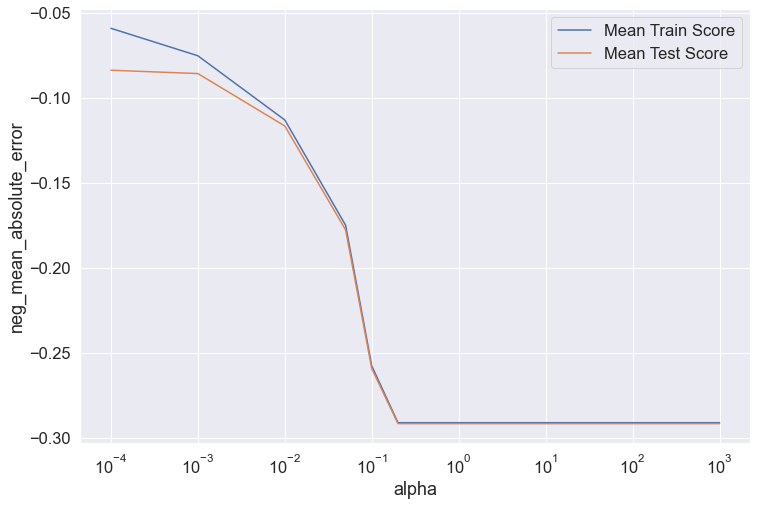

In [66]:
# Plotting the mean test and train scoes with alpha. 
plt.figure(figsize = (12, 8))
plt.plot(cv_lasso['param_alpha'], cv_lasso['mean_train_score'])
plt.plot(cv_lasso['param_alpha'], cv_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.legend(['Mean Train Score', 'Mean Test Score'])
plt.xscale('log')
plt.show()

In [67]:
# Evaluate the optimal value of alpha.
lasso_cv.best_params_

{'alpha': 0.0001}

#### So, the optimum value of alpha is 0.0001.

In [68]:
# Define a ridge regreesion instance with alpha = 6.0.
lasso = Lasso(alpha = 0.0001)

# Fit the model to the training data.
lasso.fit(X_train, y_train)

# The coefficients of the fitted LASSO regression model.
print(lasso.coef_)

[ 6.02140701e-03  3.28281185e-02  3.68645728e-03  8.70871305e-02
  2.91946571e-02  7.58910042e-02  8.82543951e-02  1.38635203e-02
  7.54900222e-03 -8.85963437e-04  6.14825229e-03 -9.42107447e-02
 -8.01410863e-02 -2.24321680e-02 -4.45497804e-02 -1.42387823e-02
 -1.08936111e-02 -0.00000000e+00  0.00000000e+00  1.99592920e-03
  0.00000000e+00  0.00000000e+00 -6.42419224e-02 -0.00000000e+00
 -4.52926178e-02  6.35926231e-02  6.73064614e-02  2.79913628e-02
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  3.13365148e-02
  0.00000000e+00  7.49569555e-03  2.35110667e-03 -9.99986546e-04
 -9.14798335e-04  1.08079144e-02 -7.64464858e-02  2.18395685e-02
 -5.25437844e-02 -0.00000000e+00 -7.69700245e-03  1.12805098e-02
  0.00000000e+00 -0.00000000e+00 -1.68122803e-02  3.78813130e-02
  7.75284582e-02  7.09829684e-03  1.08137176e-01 -6.46431306e-02
  0.00000000e+00 -0.00000000e+00 -1.40695265e-01 -8.60889957e-03
 -2.54011586e-02 -2.14730683e-02 -2.69424493e-02  3.25840025e-02
  3.69023862e-02 -1.69746

### Step 5: Residual Analysis on Train Data

In [69]:
# Model prediction on the training data.
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

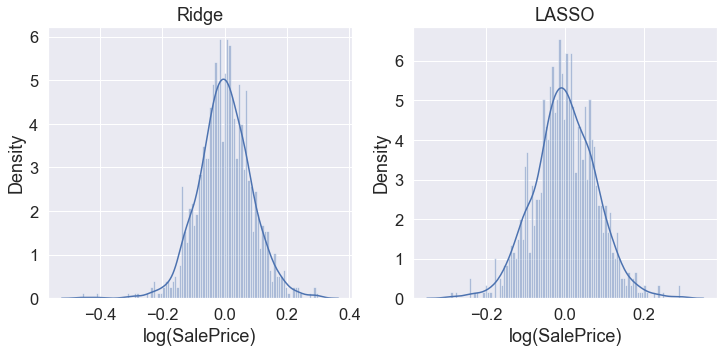

In [70]:
# Error distribution for the train data.
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100, kde = True)
plt.xlabel('log(SalePrice)')
plt.title('Ridge')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100, kde = True)
plt.xlabel('log(SalePrice)')
plt.title('LASSO')
plt.show()

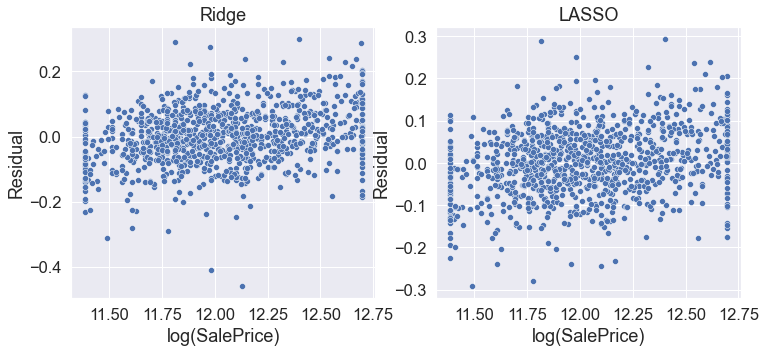

In [71]:
# Homoscedasticity checking for the train data. 
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(y_train, (y_train - y_pred_ridge_train))
plt.xlabel('log(SalePrice)')
plt.ylabel('Residual')
plt.title('Ridge')

plt.subplot(1, 2, 2)
sns.scatterplot(y_train, (y_train - y_pred_lasso_train))
plt.xlabel('log(SalePrice)')
plt.ylabel('Residual')
plt.title('LASSO')
plt.show()

In [72]:
# Check the model accuracy for the train data.
print('Train R^2 score for Ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('Train R^2 score for LASSO:', round(r2_score(y_train, y_pred_lasso_train), 2))

Train R^2 score for Ridge: 0.94
Train R^2 score for LASSO: 0.95


### Step 6: Model Prediction on Test Data

In [73]:
# Model prediction on the test data.
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

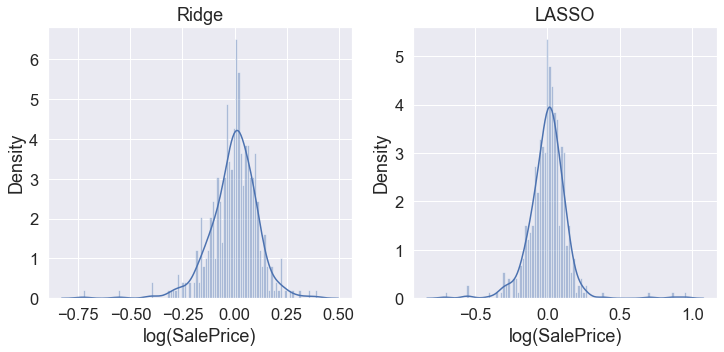

In [74]:
# Error distribution for the test data.
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100, kde = True)
plt.xlabel('log(SalePrice)')
plt.title('Ridge')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100, kde = True)
plt.xlabel('log(SalePrice)')
plt.title('LASSO')
plt.show()

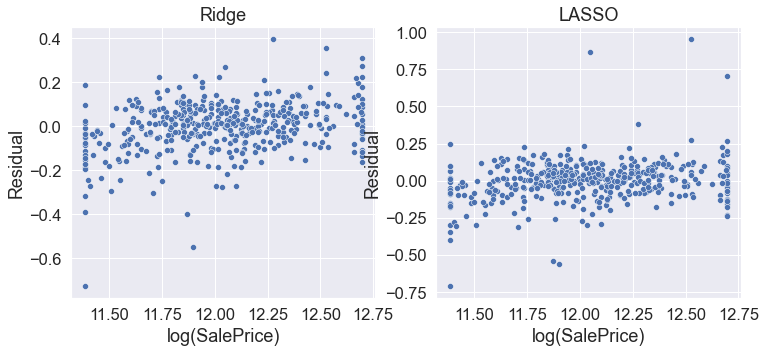

In [75]:
# Homoscedasticity checking for the test data.
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(y_test, (y_test - y_pred_ridge_test))
plt.xlabel('log(SalePrice)')
plt.ylabel('Residual')
plt.title('Ridge')

plt.subplot(1, 2, 2)
sns.scatterplot(y_test, (y_test - y_pred_lasso_test))
plt.xlabel('log(SalePrice)')
plt.ylabel('Residual')
plt.title('LASSO')
plt.show()

In [76]:
# Check the model accuracy for the test data
print('Test R^2 score for Ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('Test R^2 score for LASSO:', round(r2_score(y_test, y_pred_lasso_test), 2))

Test R^2 score for Ridge: 0.89
Test R^2 score for LASSO: 0.85


### Step 7: Model Comparison and Conclusion

In [77]:
# Create a dataframe for model comparison
model = pd.DataFrame(index = X_train.columns)
model['log(Ridge)'] = ridge.coef_
model['Ridge'] = np.exp(ridge.coef_)
model['log(Lasso)'] = lasso.coef_
model['Lasso'] = np.exp(lasso.coef_)
model.head(15)

,log(Ridge),Ridge,log(Lasso),Lasso
LotFrontage,0.006702,1.006725,0.006021,1.006040
LotArea,0.033630,1.034202,0.032828,1.033373
MasVnrArea,0.003028,1.003033,0.003686,1.003693
BsmtFinSF1,0.087265,1.091186,0.087087,1.090992
BsmtFinSF2,0.027757,1.028145,0.029195,1.029625
BsmtUnfSF,0.070623,1.073176,0.075891,1.078845
2ndFlrSF,0.084964,1.088678,0.088254,1.092266
WoodDeckSF,0.014499,1.014605,0.013864,1.013960
OpenPorchSF,0.009030,1.009071,0.007549,1.007578
EnclosedPorch,-0.000844,0.999156,-0.000886,0.999114


#### Now, as per the Ridge regression, the top 15 significant features (in descending order) in predicting the house price are:

In [78]:
# The top 15 features based on Ridge regression
print(model['Ridge'].sort_values(ascending = False)[:15])

OverallQual_9           1.151061
OverallQual_8           1.119741
OverallCond_9           1.097460
BsmtFinSF1              1.091186
2ndFlrSF                1.088678
Neighborhood_Crawfor    1.086918
GarageQual_Gd           1.077921
Neighborhood_StoneBr    1.076624
BsmtUnfSF               1.073176
SaleType_ConLD          1.067221
Neighborhood_Somerst    1.065475
GarageCars_4            1.064932
Neighborhood_ClearCr    1.057716
KitchenAbvGr_1          1.056078
OverallCond_8           1.053489
Name: Ridge, dtype: float64


#### Now, as per the LASSO regression, the top 15 significant features (in descending order) in predicting the house price are:

In [79]:
# The top 15 features based on LASSO regression
model['Lasso'].sort_values(ascending = False)[:15]

OverallQual_9           1.217732
Condition2_PosA         1.209935
SaleType_ConLD          1.202006
OverallCond_9           1.191767
OverallQual_8           1.162019
BsmtFullBath_3          1.153260
BsmtFullBath_2          1.144992
TotRmsAbvGrd_14         1.140563
GarageCars_4            1.127405
GarageQual_Gd           1.115875
Neighborhood_Crawfor    1.114201
Neighborhood_StoneBr    1.114132
KitchenAbvGr_1          1.101119
OverallCond_8           1.092595
2ndFlrSF                1.092266
Name: Lasso, dtype: float64

In [80]:
# The features removed by LASSO
print(model[model['log(Lasso)'] == 0])

                  log(Ridge)     Ridge  log(Lasso)  Lasso
MSSubClass_75       0.005737  1.005753        -0.0    1.0
MSSubClass_80       0.000241  1.000241         0.0    1.0
MSSubClass_90       0.007797  1.007827         0.0    1.0
MSSubClass_120      0.016046  1.016175         0.0    1.0
MSSubClass_180     -0.013703  0.986390        -0.0    1.0
...                      ...       ...         ...    ...
Fence_MnWw         -0.003577  0.996429         0.0    1.0
MiscFeature_No     -0.005174  0.994839        -0.0    1.0
MiscFeature_TenC    0.000000  1.000000         0.0    1.0
SaleType_ConLI     -0.014023  0.986075        -0.0    1.0
SaleType_ConLw     -0.012765  0.987316        -0.0    1.0

[91 rows x 4 columns]


#### Conclusion

1. For Ridge regression 
    - The optimum value of alpha = 6.0
    - Train data: $R^2$ = 0.94 
    - Test data: $R^2$ = 0.89

1. For LASSO regression 
    - The optimum value of alpha = 0.0001
    - Train data: $R^2$ = 0.95
    - Test data: $R^2$ = 0.85

LASSO removes 91 features, but at a significant cost. That is a significant drop in model accuracy. Ridge regression therefore provides the best prediction accuracy for the given model.

<h1> <center> Coding for Assignment-based Subjective Questions </center>

#### Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

#### Answer:
- The optimal value of alpha for Ridge regression is `6.0` and the optimal value of lambda for Lasso regression is `0.0001`.

In [81]:
# Ridge regression model with alpha = 12.0
ridge = Ridge(alpha = 12.0)

# Fit the model on training data
ridge.fit(X_train, y_train)

# Model predictions
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

In [82]:
# LASSO regression model with alpha = 0.0002
lasso = Lasso(alpha = 0.0002)

# Fit the model on training data
lasso.fit(X_train, y_train)

# Model predictions
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

In [83]:
# Create a dataframe for model comparison
model = pd.DataFrame(index = X_train.columns)
model['log(Ridge)'] = ridge.coef_
model['Ridge'] = np.exp(ridge.coef_)
model['log(Lasso)'] = lasso.coef_
model['Lasso'] = np.exp(lasso.coef_)

In [84]:
# The top 15 features based on Ridge regression
print(model['Ridge'].sort_values(ascending = False)[:15])

OverallQual_9           1.123333
OverallQual_8           1.110403
BsmtFinSF1              1.091808
2ndFlrSF                1.081654
Neighborhood_Crawfor    1.074128
BsmtUnfSF               1.072314
OverallCond_9           1.069673
GarageQual_Gd           1.057668
Neighborhood_Somerst    1.056846
Neighborhood_StoneBr    1.055139
CentralAir_Y            1.048972
Exterior1st_BrkFace     1.047716
OverallCond_7           1.047070
OverallCond_8           1.045745
Neighborhood_ClearCr    1.043822
Name: Ridge, dtype: float64


In [85]:
# The top 15 features based on LASSO regression
model['Lasso'].sort_values(ascending = False)[:15]

OverallQual_9           1.223712
OverallCond_9           1.179879
OverallQual_8           1.164999
SaleType_ConLD          1.130425
Neighborhood_Crawfor    1.115639
GarageCars_4            1.115177
GarageQual_Gd           1.114328
Neighborhood_StoneBr    1.095282
BsmtFinSF1              1.095183
BsmtFullBath_2          1.094219
KitchenAbvGr_1          1.091795
2ndFlrSF                1.089926
OverallCond_8           1.086967
BsmtUnfSF               1.079809
OverallCond_7           1.078344
Name: Lasso, dtype: float64

#### Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

#### Answer:

In [86]:
# List of top 5 features predicted by LASSO
Col3 = ['OverallQual_9', 'Condition2_PosA', 'SaleType_ConLD', 'OverallCond_9', 'OverallQual_8'] 

In [87]:
# Drop the above features from both the train and test data
X_train = X_train.drop(Col3, axis = 1)
X_test = X_test.drop(Col3, axis = 1)

In [88]:
# 5-fold cross-validation by Lasso
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'neg_mean_absolute_error', cv = 5, 
                       return_train_score = True, verbose = 1, n_jobs = -1)            
lasso_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [89]:
# The optimal value of alpha
lasso_cv.best_params_

{'alpha': 0.0001}

In [90]:
# LASSO regression model with alpha = 0.0001
lasso = Lasso(alpha = 0.0001)

# Fit the model on training data
lasso.fit(X_train, y_train)

# Model predictions
y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

In [91]:
# Create a dataframe for model evaluation
model = pd.DataFrame(index = X_train.columns)
model['log(Lasso)'] = lasso.coef_
model['Lasso'] = np.exp(lasso.coef_)

In [92]:
# The top 5 features (in descending order) based on LASSO regression
model['Lasso'].sort_values(ascending = False)[:5]

BsmtFullBath_2     1.155504
TotRmsAbvGrd_14    1.149510
GarageQual_Gd      1.137014
BsmtFullBath_3     1.122209
GarageCars_4       1.119289
Name: Lasso, dtype: float64

<h3> <center> Note: Answers to all the questions are given in the uploaded pdf file. </center> </h3>